In [194]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv('./data.csv') # Removed few outlier points
df = df.fillna(-1)
dfnew = pd.read_csv('./new.csv')
getColumn = lambda col: list(filter(lambda n: n != -1, df[col].values))

In [205]:
# Discharge columns
dt1 = getColumn("discharge1_t")[2757:2771]
di1 = getColumn("discharge1_c")[2757:2771]
dv1 = getColumn("discharge1_v")[2757:2771]

dt2 = getColumn("discharge2_t")[4811:4824]
di2 = getColumn("discharge2_c")[4811:4824]
dv2 = getColumn("discharge2_v")[4811:4824]

dt3 = getColumn("discharge3_t")[889:902]
di3 = getColumn("discharge3_c")[889:902]
dv3 = getColumn("discharge3_v")[889:902]

dt4 = getColumn("discharge4_t")[2614:2628]
di4 = getColumn("discharge4_c")[2614:2628]
dv4 = getColumn("discharge4_v")[2614:2628]

dt5 = getColumn("discharge5_t")[2836:2849]
di5 = getColumn("discharge5_c")[2836:2849]
dv5 = getColumn("discharge5_v")[2836:2849]

# Charge columns
ct1 = getColumn("charge1_t")[5027:5040]
ci1 = getColumn("charge1_c")[5027:5040]
cv1 = getColumn("charge1_v")[5027:5040]

ct2 = np.array(getColumn("charge2_t")[1759:1771])
ci2 = np.array(getColumn("charge2_c")[1759:1771])
cv2 = np.array(getColumn("charge2_v")[1759:1771])

ct3 = getColumn("charge3_t")[2702:2714]
ci3 = getColumn("charge3_c")[2702:2714]
cv3 = getColumn("charge3_v")[2702:2714]

ct4 = getColumn("charge4_t")[2948:2961]
ci4 = getColumn("charge4_c")[2948:2961]
cv4 = getColumn("charge4_v")[2948:2961]

ct5 = getColumn("charge5_t")[4853:4865]
ci5 = getColumn("charge5_c")[4853:4865]
cv5 = getColumn("charge5_v")[4853:4865]


[0.00480134 0.00449488 0.00480778 0.00447414 0.00480662]
0.0038071403658848117


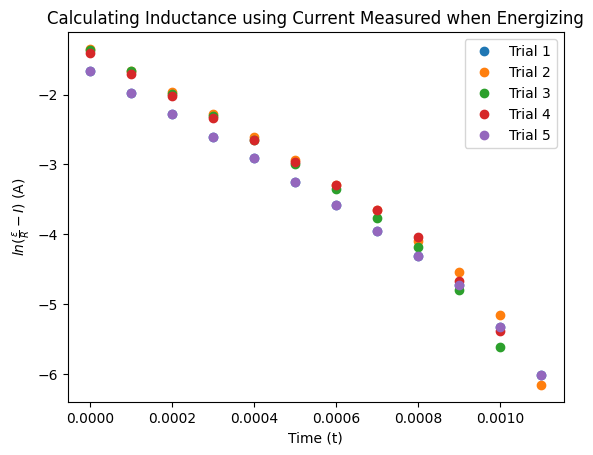

In [ ]:
ds1 = pd.read_csv('./data.csv')

# DISCHARGE USING CURRENT 
d1 = np.polyfit(dt1, np.log(di1), 1)[0]
d2 = np.polyfit(dt2, np.log(di2), 1)[0]
d3 = np.polyfit(dt3, np.log(di3), 1)[0]
d4 = np.polyfit(dt4, np.log(di4), 1)[0]
d5 = np.polyfit(dt5, np.log(di5), 1)[0]


ir = 4.2718

discharge = - 14.2718 / np.array([d1, d2, d3, d4, d5])
print(discharge)

plt.plot(dt1, np.log(di1), 'o', label = 'Trial 1')
plt.plot(dt2, np.log(di2), 'o', label = 'Trial 2')
plt.plot(dt3, np.log(di3), 'o', )


In [ ]:
# CHARGE USING CURRENT
#( (ln(I) - ln(I0) ) / I0 ) / t = R / L
c1 = np.polyfit(ct1[:-1], np.log((ci1[-1]-ci1[:-1])), 1)[0]
c2 = np.polyfit(ct2[:-1], np.log((ci2[-1]-ci2[:-1])), 1)[0]
c3 = np.polyfit(ct3[:-1], np.log((ci3[-1]-ci3[:-1])), 1)[0]
c4 = np.polyfit(ct4[:-1], np.log((ci4[-1]-ci4[:-1])), 1)[0]
c5 = np.polyfit(ct5[:-1], np.log((ci5[-1]-ci5[:-1])), 1)[0]
charge = -18 / np.array([c1, c2, c3, c4, c5])
print(charge)
print(-14.2728 / c1)

# plt.plot(ct5[:-1], np.log((ci5[-1]-ci5[:-1])/ci5[-1]), 'o')
plt.plot(ct1[:-1] - ct1[0], np.log((ci1[-1]-ci1[:-1])), 'o', label = 'Trial 1')
plt.plot(ct4[:-1] - ct4[0], np.log((ci4[-1]-ci4[:-1])), 'o', label = 'Trial 2')
plt.plot(ct2[:-1] - ct2[0], np.log((ci2[-1]-ci2[:-1])), 'o', label = 'Trial 3')
plt.plot(ct3[:-1] - ct3[0], np.log((ci3[-1]-ci3[:-1])), 'o', label = 'Trial 4')
plt.plot(ct1[:-1] - ct1[0], np.log((ci1[-1]-ci1[:-1])), 'o', label = 'Trial 5')
plt.xlabel('Time (t)')
plt.ylabel(r'$ln(\frac{\varepsilon}{R} - I)$ (A)')
plt.title('Calculating Inductance using Current Measured when Energizing')
plt.legend()



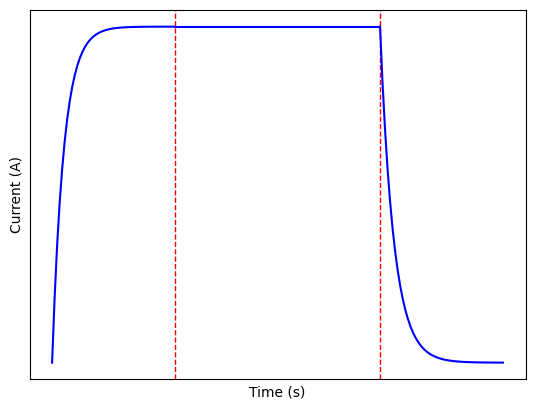

In [192]:
x1 = np.linspace(0, 0.3, 50)
y1 = 1 - np.e **(-35*x1)
x2 = np.linspace(0.3, 0.8, 50)
y2 = np.full(50, 1)
x3 = np.linspace(0.8, 1.1)
y3 = np.e ** (-30*x1)
plt.plot(x1, y1, color='blue')
plt.axvline(x=0.3, color = 'r', linestyle='--', linewidth=1)
plt.plot(x2, y2, color = 'blue')
plt.axvline(x=0.8, color = 'r', linestyle='--', linewidth=1)
plt.plot(x3, y3, color = 'blue')
plt.xticks([])
plt.yticks([])
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.savefig('./currentdemo')